In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Step 1: Load the historical stock price data

In [2]:
data = pd.read_csv('/content/NASDAQ_data1.csv')

In [3]:
data

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1971-05-02,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000e+00
1,1,1971-08-02,100.839996,100.839996,100.839996,100.839996,100.839996,0.000000e+00
2,2,1971-09-02,100.760002,100.760002,100.760002,100.760002,100.760002,0.000000e+00
3,3,1971-10-02,100.690002,100.690002,100.690002,100.690002,100.690002,0.000000e+00
4,4,1971-11-02,101.449997,101.449997,101.449997,101.449997,101.449997,0.000000e+00
...,...,...,...,...,...,...,...,...
13172,13172,2023-01-05,12210.049810,12261.320310,12181.080080,12212.599610,12212.599610,5.168430e+09
13173,13173,2023-02-05,12198.019530,12206.580080,12015.230470,12080.509770,12080.509770,5.501410e+09
13174,13174,2023-03-05,12097.040040,12212.549810,12022.459960,12025.330080,12025.330080,5.782160e+09
13175,13175,2023-04-05,11997.339840,12033.150390,11925.370120,11966.400390,11966.400390,4.745780e+09


In [13]:
data.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,,
1971-05-02,0,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,100.839996
1971-08-02,1,100.839996,100.839996,100.839996,100.839996,100.839996,0.0,100.760002
1971-09-02,2,100.760002,100.760002,100.760002,100.760002,100.760002,0.0,100.690002
1971-10-02,3,100.690002,100.690002,100.690002,100.690002,100.690002,0.0,101.449997
1971-11-02,4,101.449997,101.449997,101.449997,101.449997,101.449997,0.0,102.050003


In [15]:
data.shape

(13176, 8)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13176 entries, 1971-05-02 to 2023-04-05
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13176 non-null  int64  
 1   Open        13176 non-null  float64
 2   High        13176 non-null  float64
 3   Low         13176 non-null  float64
 4   Close       13176 non-null  float64
 5   Adj Close   13176 non-null  float64
 6   Volume      13176 non-null  float64
 7   Target      13176 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 926.4 KB


# Step 2: Data Preprocessing

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

Exploratory Data Analysis

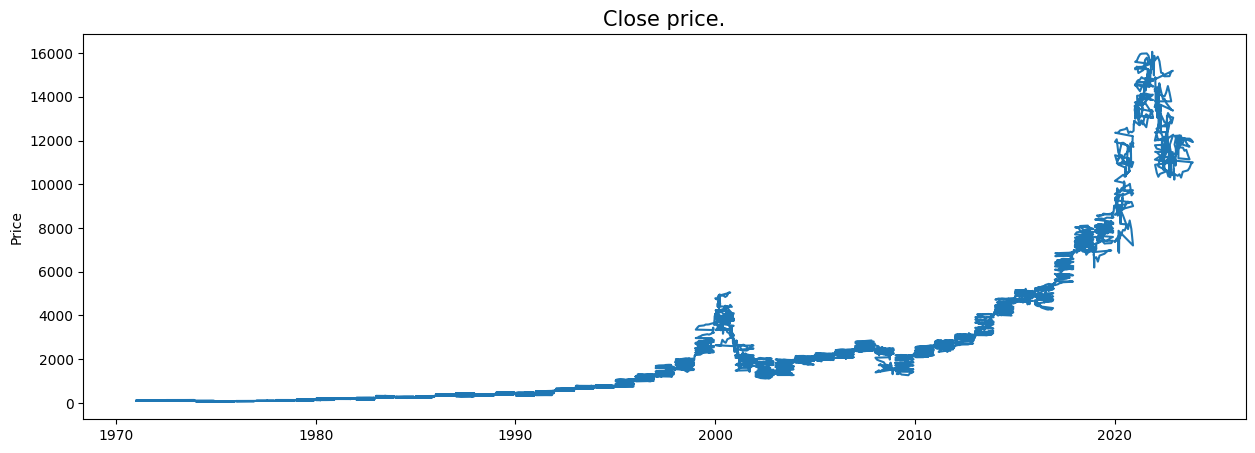

In [21]:

plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('Close price.', fontsize=15)
plt.ylabel('Price')
plt.show()

In [22]:
data.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,,
1971-05-02,0,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,100.839996
1971-08-02,1,100.839996,100.839996,100.839996,100.839996,100.839996,0.0,100.760002
1971-09-02,2,100.760002,100.760002,100.760002,100.760002,100.760002,0.0,100.690002
1971-10-02,3,100.690002,100.690002,100.690002,100.690002,100.690002,0.0,101.449997
1971-11-02,4,101.449997,101.449997,101.449997,101.449997,101.449997,0.0,102.050003


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
print("Dataset Overview:")
print(data.head())
print(data.info())
print(data.describe())



Dataset Overview:
            Unnamed: 0        Open        High         Low       Close  \
Date                                                                     
1971-05-02           0  100.000000  100.000000  100.000000  100.000000   
1971-08-02           1  100.839996  100.839996  100.839996  100.839996   
1971-09-02           2  100.760002  100.760002  100.760002  100.760002   
1971-10-02           3  100.690002  100.690002  100.690002  100.690002   
1971-11-02           4  101.449997  101.449997  101.449997  101.449997   

             Adj Close  Volume      Target  
Date                                        
1971-05-02  100.000000     0.0  100.839996  
1971-08-02  100.839996     0.0  100.760002  
1971-09-02  100.760002     0.0  100.690002  
1971-10-02  100.690002     0.0  101.449997  
1971-11-02  101.449997     0.0  102.050003  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13176 entries, 1971-05-02 to 2023-04-05
Data columns (total 8 columns):
 #   Column      Non-Nu

Visualizing the Closing Price over Time

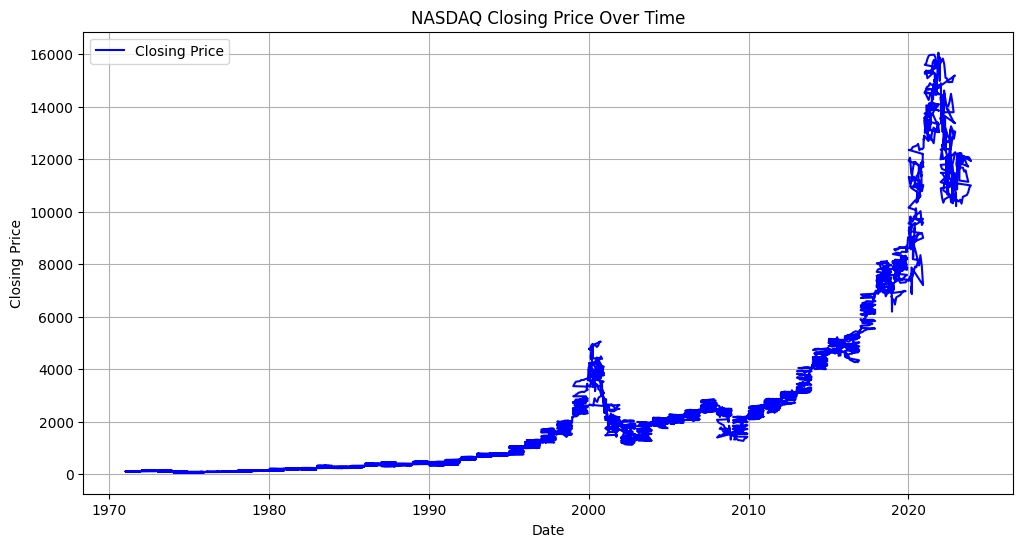

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('NASDAQ Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

Visualizing Volume of Shares Traded over Time

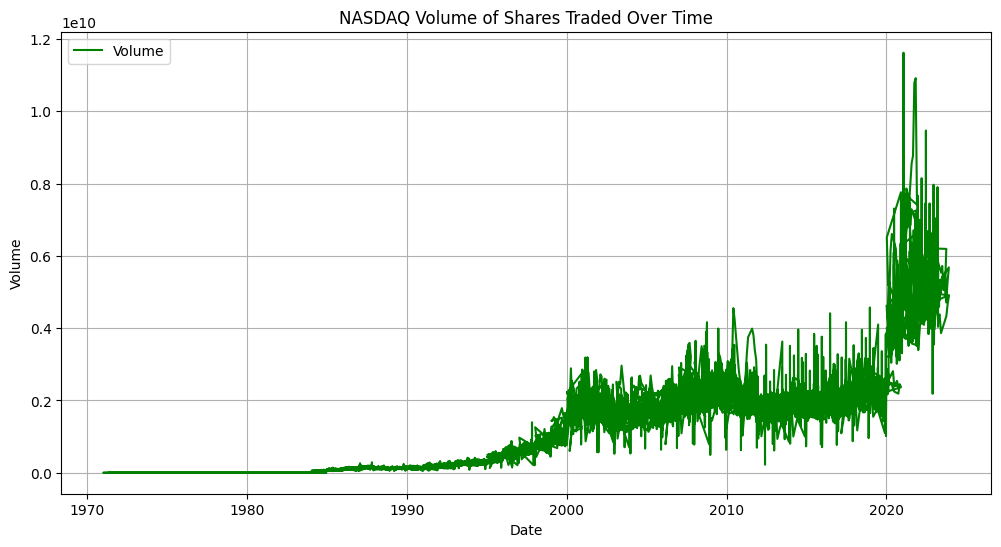

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volume'], label='Volume', color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('NASDAQ Volume of Shares Traded Over Time')
plt.legend()
plt.grid(True)
plt.show()


Pairwise Scatter Plot

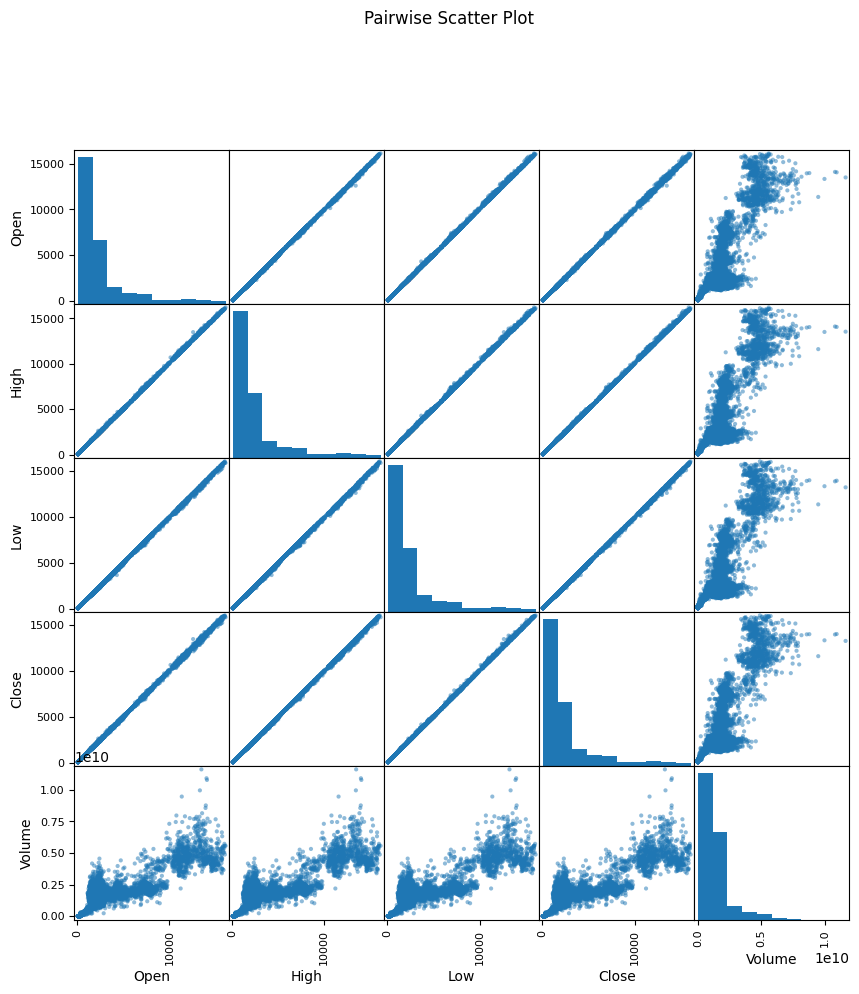

In [37]:
pd.plotting.scatter_matrix(data[['Open', 'High', 'Low', 'Close', 'Volume']], figsize=(10, 10))
plt.suptitle('Pairwise Scatter Plot', y=1.02)
plt.show()


Correlation Heatmap

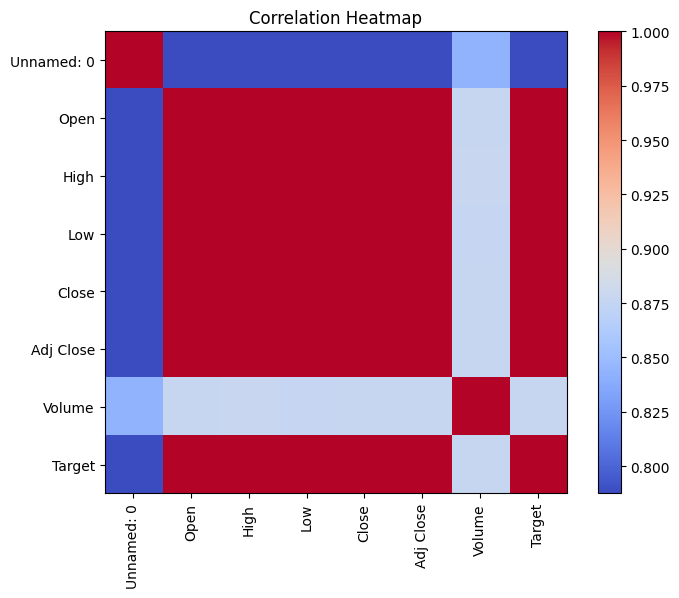

In [38]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-19-c7a16d1fc29a>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-19-c7a16d1fc29a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])
<ipython-input-19-c7a16d1fc29a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the n

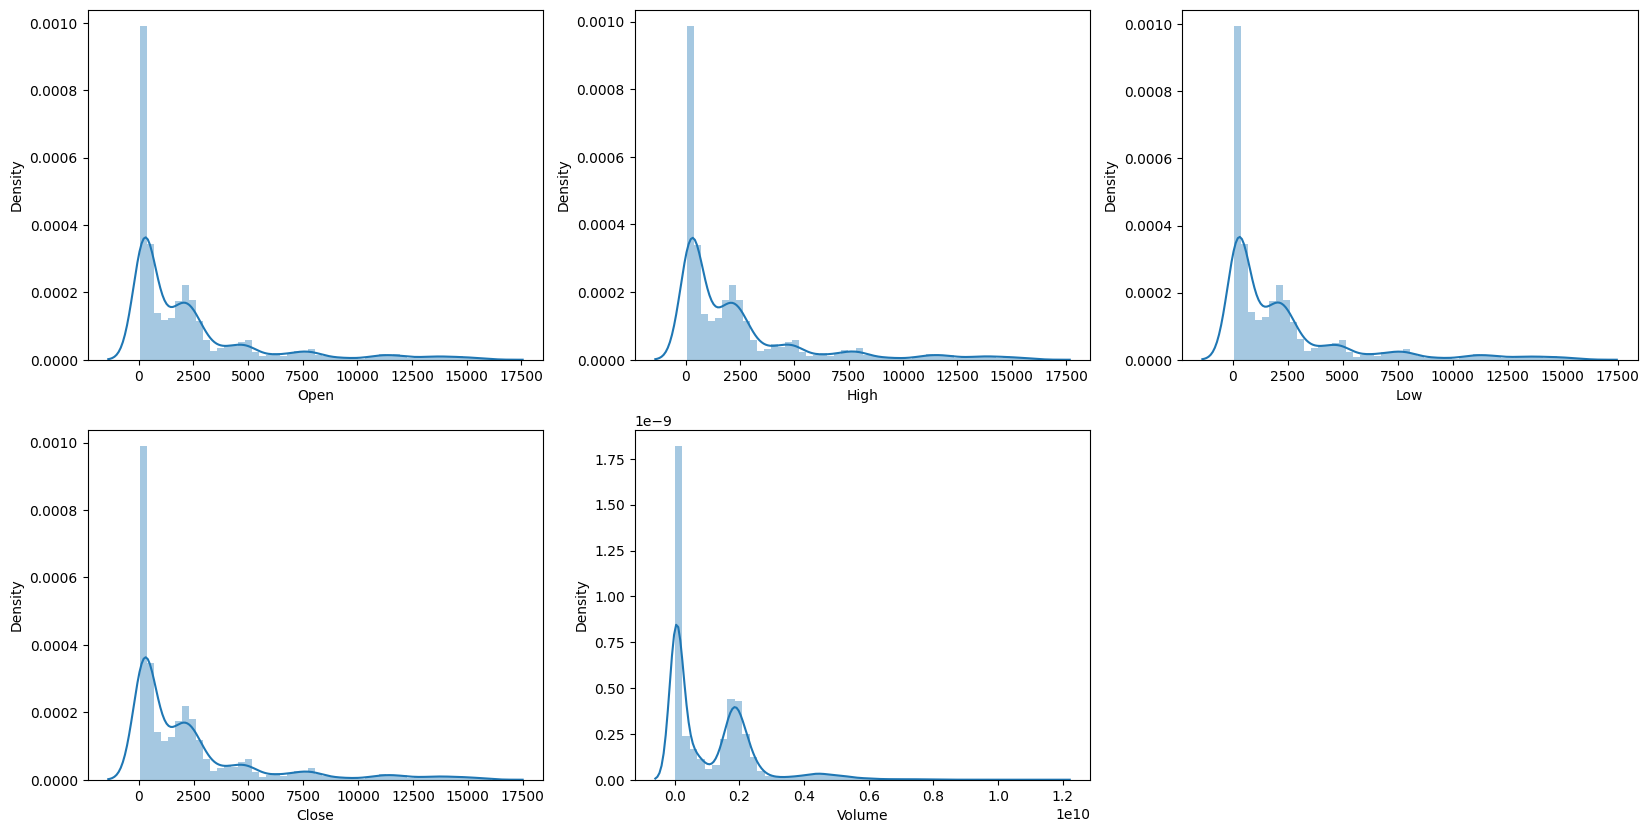

In [19]:
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(data[col])
plt.show()

<ipython-input-20-16242118e1a2>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


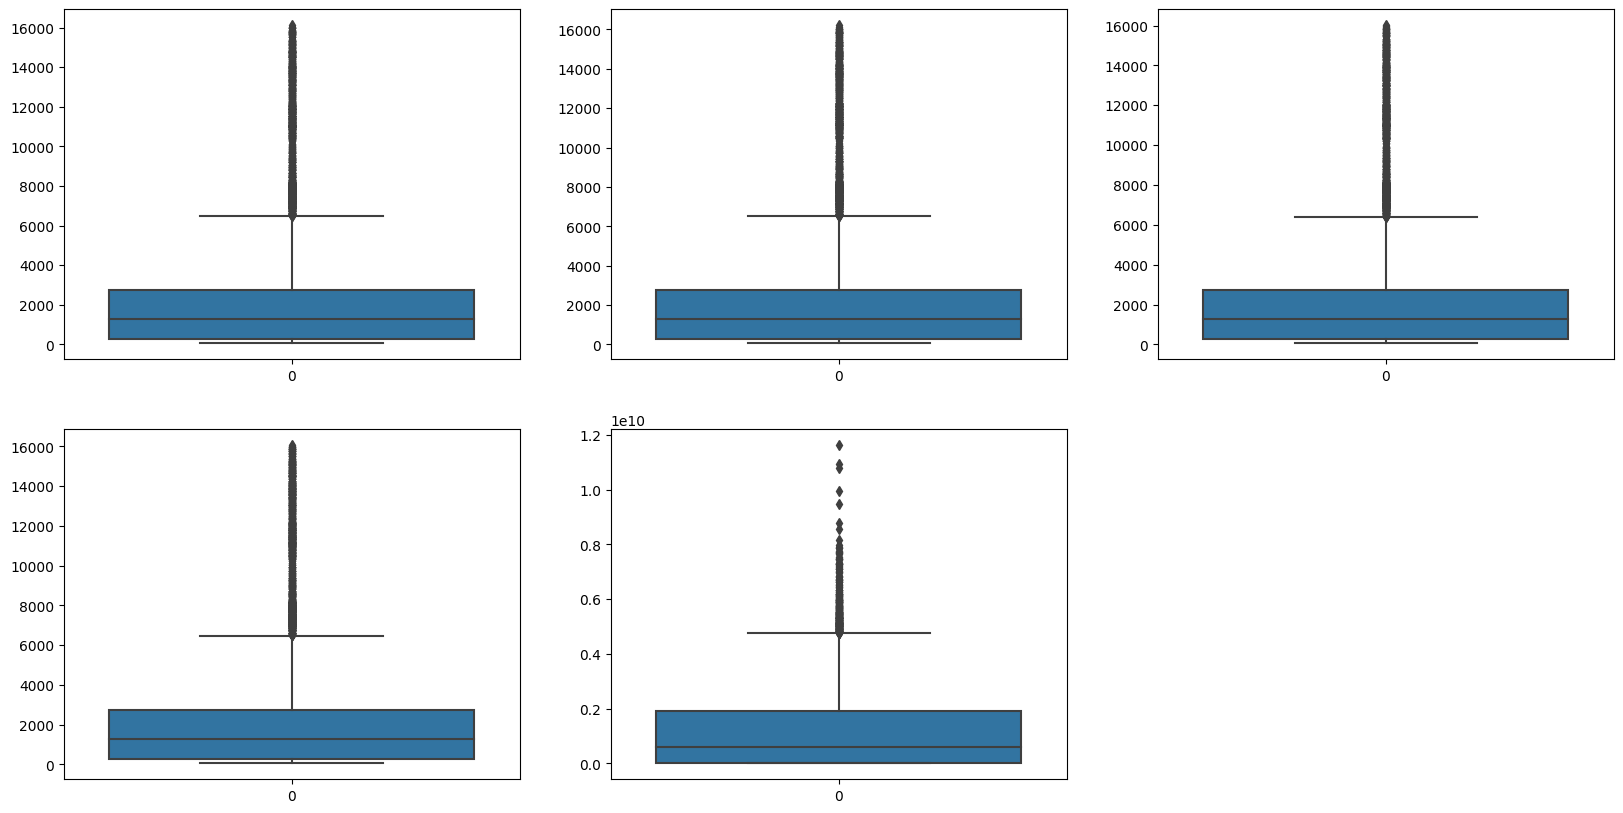

In [20]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(data[col])
plt.show()

# Create a new column 'Target' containing the stock prices shifted one day back

In [5]:
data['Target'] = data['Close'].shift(-1)

# Drop rows with missing values

In [6]:
data.dropna(inplace=True)


# Step 3: Feature Engineering


In [7]:
features = data[['Open', 'High', 'Low', 'Volume']]

# Step 4: Train-Test Split

In [8]:
X = features.values
y = data['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Model Training

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 6: Model Evaluation

In [10]:

y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 3104.325048258651
R-squared (R2): 0.9996998244219053


# Step 7: Visualize Results

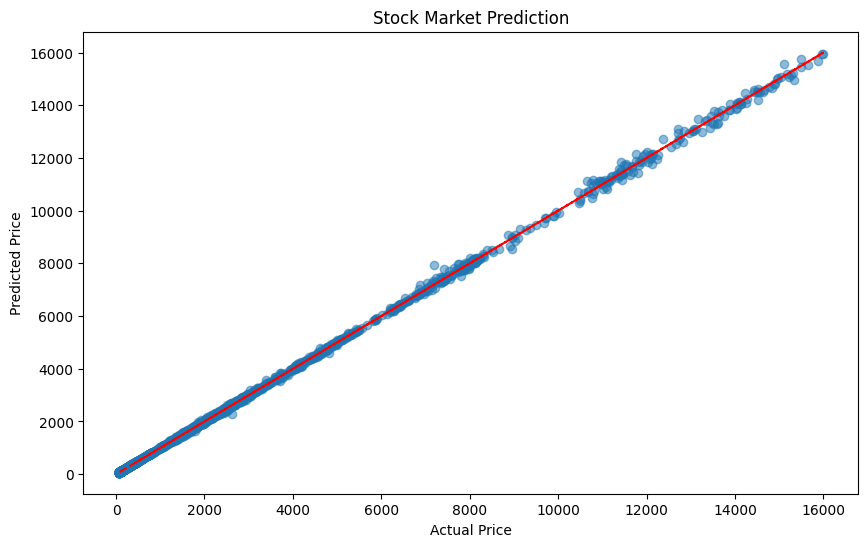

In [12]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Stock Market Prediction')
plt.show()

Support Vector Regression (SVR)


In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [39]:
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)


In [40]:
X = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = data['Target'].values


In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [42]:
split_ratio = 0.8
split_index = int(len(X_scaled) * split_ratio)

In [43]:
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [46]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)


SVR(kernel='linear')

In [47]:
y_pred_svr = svr_model.predict(X_test)

In [48]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Mean Squared Error (MSE):", mse_svr)
print("SVR R-squared (R2):", r2_svr)

SVR Mean Squared Error (MSE): 79821.7430536108
SVR R-squared (R2): 0.9935997023554775


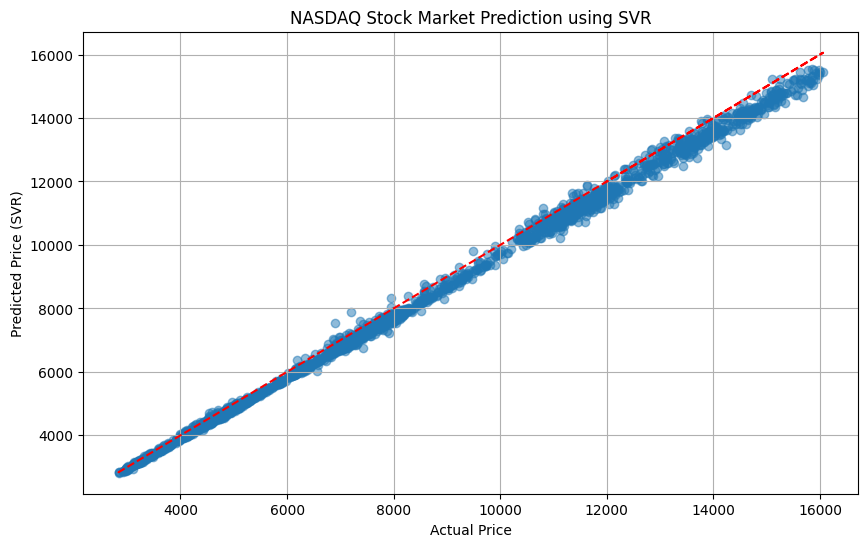

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (SVR)')
plt.title('NASDAQ Stock Market Prediction using SVR')
plt.grid(True)
plt.show()

Random Forest Regression

In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [51]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
y_pred_rf = rf_model.predict(X_test)

In [53]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error (MSE):", mse_rf)
print("Random Forest R-squared (R2):", r2_rf)

Random Forest Mean Squared Error (MSE): 19816377.025210906
Random Forest R-squared (R2): -0.5889243500012722


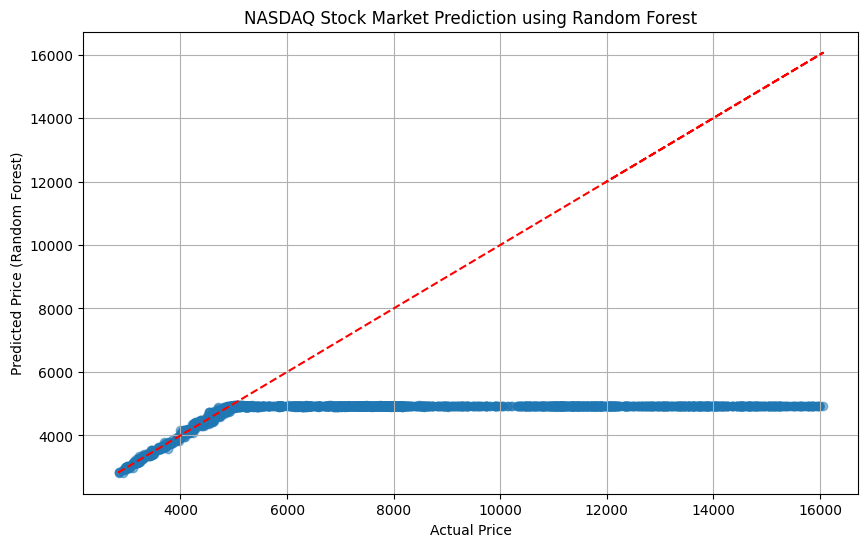

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Random Forest)')
plt.title('NASDAQ Stock Market Prediction using Random Forest')
plt.grid(True)
plt.show()

Long Short-Term Memory (LSTM)

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [56]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [57]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [58]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
10540/10540 - 40s - loss: 1873570.5000 - 40s/epoch - 4ms/step
Epoch 2/50
10540/10540 - 21s - loss: 1439027.7500 - 21s/epoch - 2ms/step
Epoch 3/50
10540/10540 - 20s - loss: 1104376.6250 - 20s/epoch - 2ms/step
Epoch 4/50
10540/10540 - 20s - loss: 837661.5625 - 20s/epoch - 2ms/step
Epoch 5/50
10540/10540 - 22s - loss: 628438.9375 - 22s/epoch - 2ms/step
Epoch 6/50
10540/10540 - 20s - loss: 464358.9375 - 20s/epoch - 2ms/step
Epoch 7/50
10540/10540 - 20s - loss: 342908.3750 - 20s/epoch - 2ms/step
Epoch 8/50
10540/10540 - 20s - loss: 255169.4375 - 20s/epoch - 2ms/step
Epoch 9/50
10540/10540 - 20s - loss: 192042.0000 - 20s/epoch - 2ms/step
Epoch 10/50
10540/10540 - 24s - loss: 145605.2500 - 24s/epoch - 2ms/step
Epoch 11/50
10540/10540 - 20s - loss: 113567.6719 - 20s/epoch - 2ms/step
Epoch 12/50
10540/10540 - 19s - loss: 90646.1641 - 19s/epoch - 2ms/step
Epoch 13/50
10540/10540 - 21s - loss: 74522.5469 - 21s/epoch - 2ms/step
Epoch 14/50
10540/10540 - 21s - loss: 62007.6797 - 21s/epoc

In [59]:
y_pred_lstm = lstm_model.predict(X_test_reshaped)
y_pred_lstm = y_pred_lstm.reshape(-1)

83/83 [==============================] - 1s 3ms/step


In [60]:
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print("LSTM Mean Squared Error (MSE):", mse_lstm)
print("LSTM R-squared (R2):", r2_lstm)

LSTM Mean Squared Error (MSE): 25575255.596950214
LSTM R-squared (R2): -1.0506849624328853


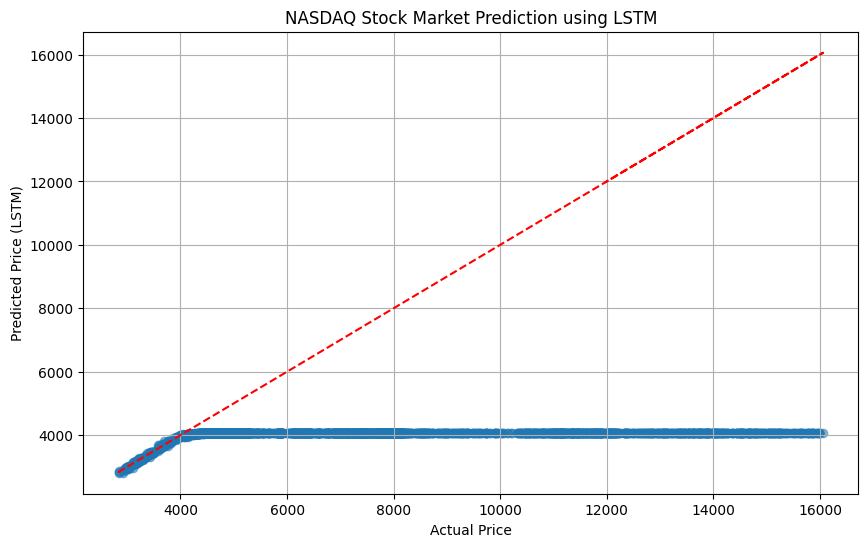

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lstm, alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (LSTM)')
plt.title('NASDAQ Stock Market Prediction using LSTM')
plt.grid(True)
plt.show()